# Income & Education Data Analysis

**Objective**: To explore the correlation between education level, age, and income, and to identify the key factors that most significantly impact income levels.

**Dataset**: This analysis is based on the [Adult Income Dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the UCI Machine Learning Repository, which contains demographic data related to income, education, and other attributes.

**Analysis Steps**:

- **Data Preprocessing and Feature Engineering**: Handle categorical features, manage missing values, and prepare the data for analysis.
- **Exploratory Data Analysis and Correlation**: Build visualizations and conduct correlation analysis to identify factors like education and age that influence income.
- **Modeling**: Build a simple regression model to predict income based on the identified key factors.

## 1. Data Introduction

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all required libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2)

In [4]:
# metadata 
adult_data.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

In [5]:
# variable information 
adult_data.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [6]:
adult = adult_data.data.original

In [7]:
# Rename columns
new_columns = {}
for column in adult.columns:
    new_columns[column] = column.replace('-', '_')

adult = adult.rename(columns=new_columns)

In [8]:
# View data information
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
# Let's review first 20 rows
adult.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## 2. Data Preprocessing

### 2.1 Missing value imputation

In [10]:
# Count missing values
adult.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [11]:
# Remove missing values
adult = adult.dropna()

### 2.2 Categorical Features

Most machine learning models, especially those based on mathematical calculations like linear regression or logistic regression, work with numerical data. They can’t handle categorical features directly because these features contain labels or text (strings), which can’t be meaningfully compared or calculated by a model.

To make categorical data understandable to models, we need to convert these categories into numbers.

In [12]:
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital_status', 'occupation', 
                                 'relationship', 'race', 'sex', 'native_country'], drop_first=True)

### 2.3 Label Encoding for Target Variable

In [13]:
adult['income'] = adult['income'].apply(lambda x: 1 if '>50K' in x else 0)

## 3. Exploratory Data Analysis (EDA)

The goal of EDA is to understand the data better, identify patterns, and determine relationships between variables.

### 3.1 Income vs Education Level

We will create a bar plot to understand how income is distributed across education levels.

Text(0.5, 1.0, 'Income vs Education Level')

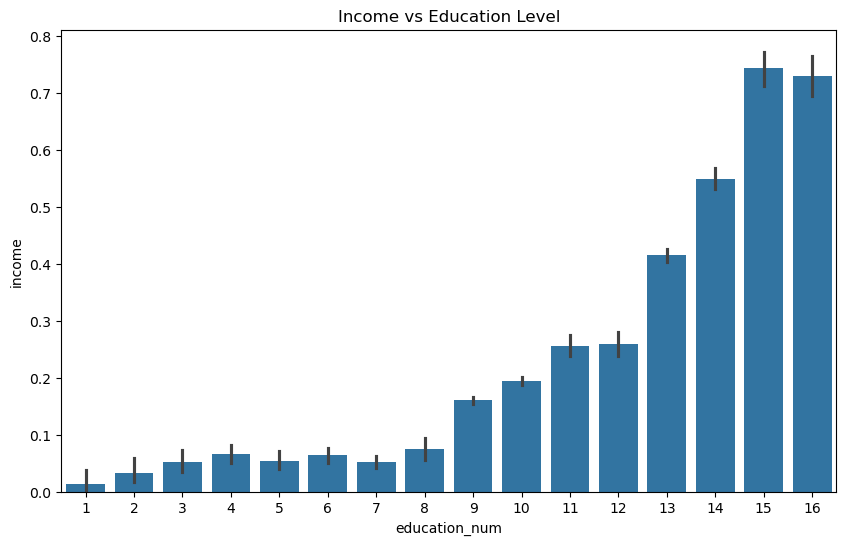

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education_num', y='income', data=adult)
plt.title('Income vs Education Level')

---
#### Key Observations:

1. **Increasing Trend**: As the education level increases (from 1 to 16 on the x-axis), the proportion of people earning a higher income (on the y-axis) also increases. This is a clear indication that education level has a positive correlation with income — the more education someone has, the higher the likelihood that they earn more.
2. **Low Education Levels (1-8)**: For lower education levels (values 1 through 8, which might correspond to lower or incomplete education such as elementary school or some high school), the proportion of people earning a higher income is very small. This makes sense, as individuals with lower education levels often have fewer opportunities for high-paying jobs.
3. **Education Level 9-13 (Some College to Bachelor's)**: Starting from around `education_num` 9 to 13 (which may represent high school graduates, some college, or associate's degrees), the proportion of people earning a higher income starts to rise significantly. This suggests that finishing high school and pursuing further education starts to pay off in terms of income.
4. **Higher Education (14-16, Advanced Degrees)**: At the highest levels of education (`education_num` 14 to 16, which could represent Bachelor's, Master's, and Doctoral degrees), the proportion of individuals earning more than $50K rises sharply. People with advanced degrees (especially `education_num` 15 and 16) have the highest likelihood of earning more, reflecting the benefits of higher education on earning potential.
5. **Plateau or Slight Drop at the End**: Notice that at the highest level of education (`education_num` 16), the income doesn’t increase dramatically beyond level 15. It might suggest that, while having an advanced degree (like a PhD) still provides higher income potential, the marginal increase in income might not be as large as moving from lower education levels to a Master's degree.

---

#### Interpretation:

- **Positive Correlation**: There’s a clear positive relationship between education level and income — more educated individuals tend to earn higher incomes.
- **Marginal Returns**: The rate of increase in income seems to grow significantly after a high school education (education levels 9-10) and continues to grow through college degrees, but after reaching the highest education levels (Master's and PhD), the gains in income tend to plat

---

#### Error bars:
- For lower education levels, the error bars are relatively small, which suggests that the estimates of income proportion for these levels are fairly stable.
- As the education level increases (particularly for higher levels like 14-16), the error bars become slightly larger. This indicates there might be more variability or fewer individuals in the higher education categories, leading to more uncertainty in those estimates.
eau a bit.

---

#### Conclusion:

- **Key Takeaway**: The plot suggests that pursuing higher education significantly increases the chances of earning a higher income, especially beyond the high school level. However, the largest jumps seem to happen after reaching high school education, and while advanced degrees still lead to higher incomes, the growth tapers off slightly.

---

### 3.2 Income vs Age
A box plot willshow how income varies with age.

Text(0.5, 1.0, 'Income by Age Group')

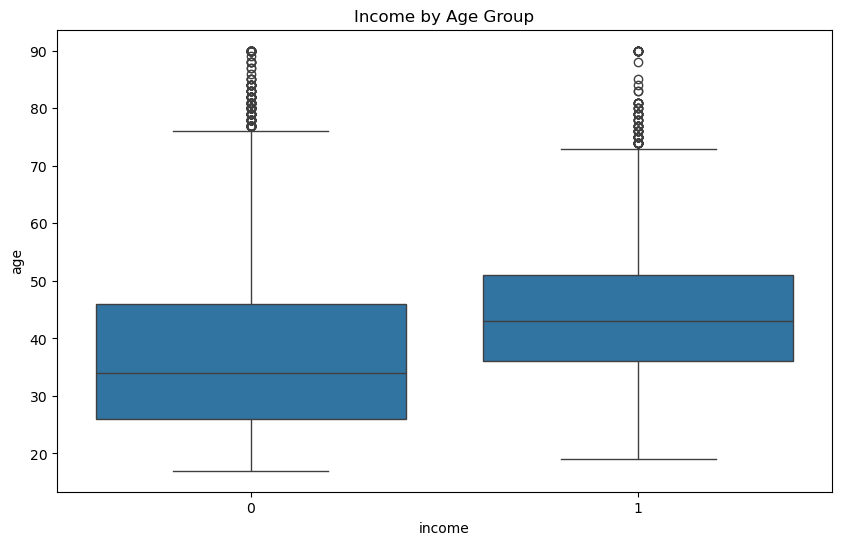

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=adult)
plt.title('Income by Age Group')

1. **X-axis (`income`)**:
    - There are two groups on the x-axis:
        - **0**: Individuals earning <= $50K (low income).
        - **1**: Individuals earning > $50K (high income).
2. **Y-axis (`age`)**:
    - This represents the age of individuals.
---
1. **Median Age**:

- For low-income earners (`income = 0`), the median age is approximately 35 years.
- For high-income earners (`income = 1`), the median age is higher, around 45 years. This suggests that higher-income earners tend to be older on average.

2. **Interquartile Range (IQR)**:

- The **box** itself shows the **interquartile range (IQR)**, which contains the middle 50% of the data:
    - For low-income earners, the IQR of ages is from approximately 27 to 48 years.
    - For high-income earners, the IQR of ages is from approximately 3x to 5l years.
- This suggests that low-income earners tend to be younger on average, while high-income earners fall into an older age range.

3. **Whiskers**:

- The vertical lines (whiskers) extend from the box and represent the range of the ages, except for the outliers. The whiskers extend to the **minimum** and **maximum** non-outlier values.
    - For low-income earners, the age range (excluding outliers) is roughly from 20 to 70 years.
    - For high-income earners, the age range is slightly narrower, from about 30 to 70 years.

4. **Outliers**:

- Both groups have outliers, but the high-income group (`income = 1`) has more outliers for people aged above 70, indicating there are a few older individuals who earn high incomes.
---

#### Summary and Analysis:

- **Older Age Correlates with Higher Income**: The plot shows a clear trend that people who earn more tend to be older on average. This makes sense as people typically earn higher salaries later in their careers after accumulating experience.
- **Lower Income for Younger Individuals**: The low-income group has a younger median age, suggesting that younger individuals are more likely to earn less. This could be due to their early career stages, where they are still building experience.
- **Wider Age Range for Low-Income Earners**: The low-income earners have a wider age distribution, indicating that people of all ages (both young and older) can fall into this group. Conversely, high-income earners tend to be more concentrated in a certain age range (35–55 years).

#### Conclusion:

This box plot confirms that **age is a significant factor** when it comes to income levels. Higher incomes are generally associated with older individuals, possibly reflecting career advancement over time, while younger people are more likely to have lower incomes.

---

### 3.3 Correlation

In [16]:
# Find correlations with income
corr_with_income = adult.corr()['income'].sort_values(ascending=False)

# Display the top 10 features
top_10_features = corr_with_income[1:11]
top_10_features

marital_status_Married-civ-spouse    0.445674
education_num                        0.332845
age                                  0.231986
hours_per_week                       0.227527
capital_gain                         0.222509
sex_Male                             0.215325
occupation_Exec-managerial           0.210287
occupation_Prof-specialty            0.186280
education_Bachelors                  0.179740
education_Masters                    0.172563
Name: income, dtype: float64

Text(0.5, 1.0, 'Top 10 Features Correlated with Income')

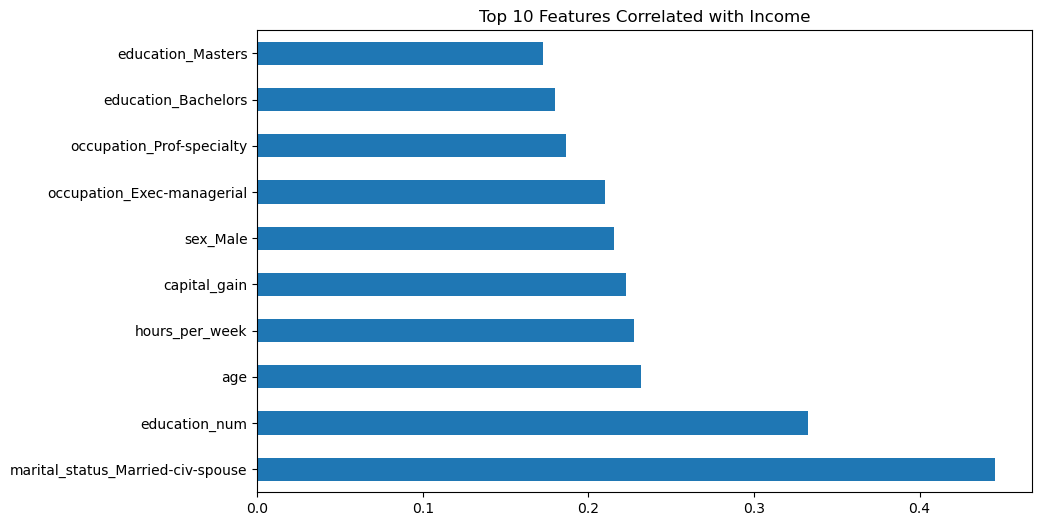

In [17]:
# Plot top 10 features as a bar chart
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh')
plt.title('Top 10 Features Correlated with Income')

#### Key Observations from the Correlations:

1. **marital_status_Married-civ-spouse** (Correlation: ~0.45)
    - Being married to a civilian spouse appears to have the **strongest positive correlation** with income. This could reflect the fact that married individuals, especially those in stable relationships, may benefit from dual-income households, or they might be at a later stage in their career with higher income potential.

2. **education_num** (Correlation: ~0.33)
    - This feature represents the numerical level of education (the more advanced your education, the higher this value). It's no surprise that **education** is highly correlated with income, as higher levels of education often lead to better-paying jobs.

3. **age** (Correlation: ~0.23)
    - **Age** also has a moderately positive correlation with income. As we’ve seen in the previous box plot, older individuals tend to have higher income, likely due to career experience and progression over time.

4. **hours_per_week** (Correlation: ~0.23)
    - The number of hours worked per week also correlates with income, meaning those who work more hours tend to earn more. This aligns with the idea that overtime or longer working hours can lead to higher salaries, especially in jobs where compensation is tied to hours worked.

5. **capital_gain** (Correlation: ~0.22)
    - **Capital gain** is another important factor, and this likely refers to additional income individuals earn from investments (stocks, real estate, etc.). Those who earn income from these sources are more likely to fall into the high-income category.

6. **sex_Male** (Correlation: ~0.21)
    - The **male** gender shows a positive correlation with income, suggesting that males, on average, tend to earn more than females in this dataset. This is a commonly observed trend, which may be due to various social, economic, or historical factors. *Here we also have to keep in mind that dataset is dating by 1996 year.*

7. **occupation_Exec-managerial** (Correlation: ~0.21)
    - Individuals working in **executive or managerial roles** are more likely to earn higher incomes, as these positions often come with higher salaries due to their level of responsibility and leadership within organizations.

8. **occupation_Prof-specialty** (Correlation: ~0.18)
    - **Professional specialty** roles (e.g., doctors, engineers, professors) are also positively correlated with income. These jobs typically require high levels of expertise and education, which leads to higher pay.

9. **education_Bachelors** and **education_Masters** (Correlation: ~0.17 and ~0.18)
    - Having a **Bachelor’s** or **Master’s degree** correlates positively with income, which reinforces the earlier observations that higher education levels lead to better-paying jobs.

---

#### Interpretation of Correlation Values:

- **Strongest Factor**: The feature with the highest correlation to income is **marital_status_Married-civ-spouse** (~0.45), which suggests that being married has a noticeable impact on income levels.
- **Education is Key**: Educational attainment, both in terms of **education_num** and specific degrees (like Bachelor's and Master's), is among the strongest correlates of income.
- **Age and Hours Worked**: Both **age** and **hours per week** show moderate correlations, which make sense — older people and those who work more tend to earn more.
- **Occupational Roles**: Executive and professional specialty roles have positive correlations with income, which reflects the higher pay typically associated with these positions.
- **Gender Gap**: The fact that being male correlates positively with income highlights a gender disparity in earnings.

---

#### Key Takeaways:

- **Education and Marital Status**: Educational attainment and marital status are some of the strongest predictors of income.
- **Work Factors**: Age, hours worked, and occupation type (especially executive or professional roles) also play significant roles in determining income.
- **Capital Gains**: Individuals earning income from investments have an advantage in reaching higher income levels.
- **Gender Inequality**: The positive correlation between being male and income suggests that income disparities exist between genders in this dataset.

---

#### Final Exploratory Data Analysis (EDA) Conclusion

**Dataset**: Adult Income Dataset (from 1996)

Our goal was to explore the relationship between different demographic factors and income levels (whether an individual earns more or less than $50K/year). Considering the data is from 1996, some of the trends observed may reflect social, economic, and workplace dynamics specific to that time period.

Here are the main insights:

---

1. **Education and Income**:
    - **Higher Education = Higher Income**: A clear positive correlation exists between education level and income. People with higher education degrees (Bachelor's, Master's, Doctorate) are significantly more likely to earn above $50K per year.
    - **education_num** (a numerical representation of education level) has one of the strongest correlations (~0.38) with income, confirming that the more advanced an individual's education, the higher the likelihood of higher income.
    - **Marginal Returns at the Highest Education Levels**: The income benefit of higher education increases dramatically up to a Master's degree, after which there is a plateau in returns for income. This reflects trends in the 1990s, where the Master's degree was a key differentiator, while PhDs provided diminishing financial returns outside academia or research.

2. **Age and Income**:
    - **Age is Positively Correlated with Income**: There is a moderate positive correlation (~0.23) between age and income. Older individuals, especially those in their 40s and 50s, tend to earn more, likely reflecting their career progression and experience.
    - **Younger Individuals Have Lower Incomes**: Those in their early careers (younger age groups) are more likely to earn below $50K, which aligns with the natural progression of wage increases as individuals gain more experience over time.

3. **Gender and Income**:
    - **Gender Disparity in Income**: The variable **sex_Male** shows a positive correlation with income (~0.21), indicating that men were more likely to earn higher incomes compared to women in 1996. This highlights the gender wage gap, which was still prevalent in the mid-90s and reflects historical economic and social inequalities.
    - **Wage Gap Trends of the 1990s**: During the 1990s, men were still more likely to be in higher-paying jobs or industries. This dataset reflects a time before significant strides in wage equality were made.

4. **Marital Status and Income**:
    - **Married Individuals Earn More**: **marital_status_Married-civ-spouse** has the strongest correlation with income (~0.45). Being married to a civilian spouse is a significant indicator of higher income, possibly due to dual-income households or greater financial stability.
    - **Stable Family Structures and Income**: In the 1990s, individuals in more stable family structures (especially married couples) were likely more financially secure and in better-paying jobs.

5. **Occupation and Income**:
    - **Professional and Managerial Roles Lead to Higher Income**: Occupations like **Exec-managerial** and **Prof-specialty** (e.g., doctors, engineers, executives) are highly correlated with higher incomes (~0.21). These roles typically require higher education and specialization, explaining the strong correlation with income.
    - **Shift Toward White-Collar Jobs**: During the 1990s, the U.S. economy was experiencing a shift toward service industries and white-collar jobs, as reflected by the higher incomes associated with professional and executive roles.

6. **Capital Gains and Income**:
    - **Capital Gains as a Key Income Source**: Individuals with **capital_gain** report higher incomes (~0.22 correlation). This reflects the fact that people with investments in stocks, real estate, and other financial assets have an additional source of income beyond their regular jobs.
    - **Wealth Accumulation**: In the 1990s, the U.S. economy was experiencing growth in stock markets and real estate, and people who benefited from capital gains were more likely to have higher overall incomes.

7. **Hours Worked and Income**:
    - **More Hours Worked, Higher Income**: There is a moderate correlation (~0.23) between **hours_per_week** and income. Individuals working more hours tend to earn more, which is consistent with many professions that either pay by the hour or reward overtime with higher earnings.
    - **Work-Life Balance in 1990s**: In the 1990s, longer working hours were often associated with higher-paying jobs, especially in industries like finance, law, and technology, where a culture of long hours was prevalent.

8. **Socioeconomic Context of the 1990s**:
    - **Economic Expansion**: The mid-1990s were a period of economic growth and expansion in the U.S., leading to greater income opportunities, especially for those with higher education and professional experience.
    - **Shifts in Labor Market**: The labor market was transitioning from manufacturing to service-based industries, which created more high-paying jobs for professionals, managers, and executives. The dataset reflects this shift by showing that professional occupations and higher education levels were strongly correlated with higher income.

---

#### Final Thoughts:

- **Education, Occupation, and Marital Status**: These were the most significant factors influencing income in 1990s. Higher education, stable family structures, and professional/managerial roles were the strongest indicators of earning above $50K.
- **Gender and Age**: There were noticeable disparities in income based on gender and age, with men and older individuals more likely to earn higher incomes.
- **Capital Gains**: Wealth from investments was another important factor, reflecting the growing importance of financial markets and investments in the 1990s.

---

Given that this dataset is from 1996, some of these trends might not hold in today’s labor market, as economic, social, and gender-related dynamics have shifted since then. Nonetheless, these insights provide a valuable snapshot of income distribution and its determining factors during that period.

---

## 4. Modeling

### 4.1 Train-Test Split

Before building a model, we will split the data into training and test sets.

In [ ]:
X = adult.drop('income', axis=1)  # Features
y = adult['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.2 Logistic Regression

Since our target variable is binary (income > 50K or <= 50K), we can use logistic regression. Logistic regression is sensitive to large differences in magnitude between features, so we also will scale our features using `StandardScaler` from `sklearn` before fitting the model.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on the scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
classification_report(y_test, y_pred)

### 4.3 Feature Importance

We'd like to see which factors are most important in predicting income, so we'll check the coefficients from the logistic regression.

In [ ]:
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Impacting Income')

---

The reason why we're seeing **different features** in the modeling section (logistic regression) compared to the earlier **correlation analysis** lies in the difference between **correlation coefficients** and **feature importance in modeling**:

1. **Correlation vs. Logistic Regression Coefficients**:
    - **Correlation**:
        - In the correlation analysis, we looked at the **linear relationship** between each feature and the target variable (income) independently. This means we evaluated how much a single feature was **linearly correlated** with income.
        - Correlation only measures **pairwise** relationships between each feature and the target. It does  **not account** for the interactions between multiple features.
    - **Logistic Regression Coefficients**:
        - When we run a logistic regression, the **coefficients** (or feature importance) represent how much each feature contributes to predicting the outcome (in this case, earning more than $50K). Importantly, logistic regression accounts for the **interactions** between features.
        - Some features that didn’t show a strong correlation in isolation (during the correlation analysis) might become more important when other features are considered in the model. For example, a feature that wasn’t strongly correlated with income by itself may work in combination with other features to better predict income.

2. **Modeling Captures Interactions**:
    - **Logistic regression** captures how features contribute to the prediction of income **together**. Even if a feature doesn’t have a strong individual correlation with income, it may still be highly important when combined with other features in the model.
    - For instance, **workclass_Private** and **relationship_Not-in-family** might not have shown strong correlations in the pairwise analysis but could become important when other factors are taken into account (e.g., marital status or hours worked).

3. **Different Metrics**:
    - **Correlation analysis** ranks features purely based on their linear relationship with income.
    - **Logistic regression** ranks features based on their **predictive power** in the model (coefficients), which is why we see different features emerging as important.

4. **Regularization and Feature Importance**:
    - In case of using a **regularized** logistic regression (with L2 regularization), the model may reduce the coefficients of some features to prevent overfitting. This can shift the importance rankings of features.
    - Even features with smaller absolute correlations can get higher importance in logistic regression if they are informative when combined with others.

5. **Feature Scaling**:
    - The features may be on different scales (e.g., **capital_gain** might have large values, whereas **education_num** could be smaller). **Scaling** can affect how logistic regression assigns importance to each feature. Logistic regression is sensitive to the magnitude of features, so unscaled features might appear less or more important based on their values.

---

#### Example Breakdown of the Plot:

- **Capital_gain**: This feature has the highest importance in the logistic regression model, which makes sense because individuals who report capital gains are more likely to have higher incomes. However, this feature’s importance might not have been as evident in simple correlation because capital gains may represent only a subset of individuals.
- **Marital_status_Married-civ-spouse**: This feature also appeared significant in the correlation analysis and continues to be important in logistic regression. It’s clear that marital status has a strong impact on income in this dataset.
- **Education_num**: Education is consistently important in both correlation and the logistic regression model, affirming that education level plays a significant role in determining income.
- **Age and Hours_per_week**: These features are moderately important in both correlation and logistic regression. However, the logistic regression model might weigh them differently when combined with other features.
- **Sex_Male** and **Occupation_Exec-managerial**: These features also appear to have strong predictive power, even if their correlation with income was more moderate.

---

#### Conclusion:

- **Correlation** analysis gives us an initial look at **individual feature relationships** with the target, while logistic regression accounts for the **combined effect** of features. This explains why some features that weren’t prominent in the correlation matrix now show up as important in the model.
- Logistic regression also measures **how much each feature contributes to the final prediction**, which might shift the importance of certain features when they interact with others.

---

### 5. Interpret the Results

#### 5.1 Key Findings from Exploratory Data Analysis (EDA)

1. **Education and Income**:
    - There is a clear positive correlation between education level and income. Individuals with higher education levels are more likely to earn above `$50K`.
    - The distribution of income across education levels shows a significant increase in the likelihood of earning > `$50K` for individuals with a bachelor's degree or higher.
2. **Age and Income**:
    - Higher-income individuals tend to be older, with a median age of around 45 years compared to 35 years for lower-income earners. This suggests that income potential generally increases with age, reflecting career progression and accumulated experience.
3. **Marital Status and Income**:
    - Marital status (being married) shows a strong positive correlation with income. This might be attributed to dual-income households or more stable financial conditions in married individuals, allowing for higher earnings.
4. **Gender and Income Disparities**:
    - An analysis of gender and income showed noticeable disparities. Male participants were more likely to earn above `$50K` compared to their female counterparts, indicating potential gender-based income gaps.

#### 5.2 Modeling Insights

1. **Logistic Regression Results**:
    - The logistic regression model provided insights into the factors most influential in predicting income levels. The top features (like education, marital status, and occupation) had coefficients that suggest a strong impact on the likelihood of earning > `$50K`.
2. **Feature Importance**:
    - The most important features identified by the logistic regression were `marital_status_Married-civ-spouse` and `education_num`. These features had the highest positive coefficients, indicating that being married and having a higher education are strong indicators of earning a higher income.

#### 5.3 Limitations of the Analysis

1. **Dataset Limitations**:
    - The dataset used is from 1996, which means that the trends observed may not reflect current social, economic, or workplace dynamics.
    - Some important variables like `hours worked` or `employment history` are not included, which could also significantly impact income levels.
2. **Simplified Modeling Approach**:
    - Only logistic regression was used as a baseline model. While it provides interpretability, it might not capture complex, non-linear relationships between features and income levels.
3. **Potential Bias**:
    - The dataset might contain biases due to the time period it was collected in, leading to skewed insights, especially around gender and race-based income disparities.

#### 5.4 Recommendations

1. **Further Analysis**: Explore interaction effects, as mentioned previously, and employ additional models like decision trees or gradient boosting to capture non-linear relationships.
2. **Policy Implications**: Given the strong correlation between education and income, policies promoting higher education access could help reduce income inequality.
3. **Updated Data**: It would be beneficial to replicate this analysis with more recent data to validate if these trends persist.